Install Libraries


In [2]:
!pip install groq
!pip install pytesseract
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!tesseract --version
!pip install pdfplumber pytesseract pdf2image
!sudo apt-get install -y tesseract-ocr
!pip install pytesseract pdf2image pdfminer.six
!pip install -U langchain-community
!pip install pinecone-client
#RUN THIS CELL ONLY IF YOU HAVEN'T INSTALLED THEM BEFORE OTHERWISE DON'T (If you ran this notebook before then you don't need to re-run this)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 4.0 MB/s eta 0:00:00
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,630 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,566 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [

In [ ]:
# !pip install pandas==2.2.2
#Don't run this cell

In [ ]:
# !pip install transformers torch --upgrade
# Don't run this cell


In [3]:
import os
from pdf2image import convert_from_path
from pdfminer.high_level import extract_text
from PIL import Image
import pytesseract
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer
from google.colab import files

Generate Embeddings

In [4]:


# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        if text.strip():
            return text
    except Exception as e:
        print("Failed to extract text using pdfminer:", e)

    # Fallback to OCR if pdfminer fails
    print("Using Tesseract for OCR on scanned PDF...")
    images = convert_from_path(pdf_path)
    text = ""
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ+-*/=()[]{}^~<>πσ√'

    for i, image in enumerate(images):
        text += pytesseract.image_to_string(image, config=custom_config) + "\n"

    return text

# Upload PDF
uploaded = files.upload()  # Prompt for file upload
pdf_path = next(iter(uploaded.keys()))

# Extract text from the uploaded PDF
extracted_text = extract_text_from_pdf(pdf_path)

# Split the extracted text into chunks using LangChain
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
chunks = text_splitter.create_documents([extracted_text])

# Load Sentence-BERT model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to generate embeddings
def generate_embeddings(texts):
    return model.encode([text.page_content for text in texts])

# Generate embeddings for the chunks
embeddings = generate_embeddings(chunks)

# Print the embeddings
print("Generated Embeddings:")
for i, embedding in enumerate(embeddings):
    print(f"Chunk {i + 1}: {embedding[:10]}...")  # Print first 10 values of each embedding for brevity


Saving ALevels_maths_past_papers.pdf to ALevels_maths_past_papers.pdf


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generated Embeddings:
Chunk 1: [ 0.02523382  0.01996033  0.02373217 -0.07129313  0.00211393 -0.02305574
  0.04622258  0.03625558  0.04892952  0.03939741]...
Chunk 2: [-0.08038543 -0.0029985   0.04509596 -0.08122559 -0.02992177 -0.00876958
  0.12531376  0.08751582  0.00408531 -0.01282134]...
Chunk 3: [-0.08038543 -0.0029985   0.04509596 -0.08122559 -0.02992177 -0.00876958
  0.12531376  0.08751582  0.00408531 -0.01282134]...
Chunk 4: [-0.08038543 -0.0029985   0.04509596 -0.08122559 -0.02992177 -0.00876958
  0.12531376  0.08751582  0.00408531 -0.01282134]...
Chunk 5: [-0.05548393  0.06250328 -0.0621538  -0.06103634 -0.00990361  0.01025736
  0.02924444  0.02609107 -0.00808609 -0.00127309]...
Chunk 6: [-0.08038543 -0.0029985   0.04509596 -0.08122559 -0.02992177 -0.00876958
  0.12531376  0.08751582  0.00408531 -0.01282134]...
Chunk 7: [-0.08038543 -0.0029985   0.04509596 -0.08122559 -0.02992177 -0.00876958
  0.12531376  0.08751582  0.00408531 -0.01282134]...
Chunk 8: [-0.08038543 -0.0029985 

In [4]:
# Get the dimension of the embeddings
embedding_dimension = len(embeddings[0])
print(f"Embedding Dimension: {embedding_dimension}")

Embedding Dimension: 384


In [5]:
from pinecone import Pinecone, ServerlessSpec, Index
from sentence_transformers import SentenceTransformer
from pdfminer.high_level import extract_text
from pdf2image import convert_from_path
import pytesseract
from langchain.text_splitter import RecursiveCharacterTextSplitter
from google.colab import files

# Initialize Pinecone client
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Use your actual API key

# List indexes
indexes = pc.list_indexes().names()
print("Indexes:", indexes)

# If an index exists, describe it, else create a new index
if indexes:
    index_name = indexes[0]  # Access the first index in the list and get the 'name'
    index_description = pc.describe_index(index_name)  # Pass the index name as a string
    print(f"Details of index '{index_name}':", index_description)
else:
    # Create a new index if none exist
    pc.create_index(
        name='notes',
        dimension=384,  # Update dimension according to your embedding model
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'  # Set your region here
        )
    )
    print("Created 'notes' index.")

# Access the 'notes' index using the Index class
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Prepare data for insertion into Pinecone
vectors_to_insert = []
for i, embedding in enumerate(embeddings):
    vectors_to_insert.append((
        str(i),  # Unique ID for each vector
        embedding.tolist(),  # Embedding vector
        {"chunk_id": i, "content": chunks[i].page_content[:200]}  # Optional metadata
    ))

# Insert the embeddings into Pinecone
index.upsert(vectors=vectors_to_insert)

# Verify insertion by querying the Pinecone index (optional)
query_result = index.query(vector=embeddings[0].tolist(), top_k=3)  # Corrected to use keyword arguments
print("Query Result:", query_result)

# Optionally, check the status of the index
status = index.describe_index_stats()
print("Index Stats:", status)


Indexes: ['finance', 'example-index', 'notes', 'net-sol-finance', 'financial-report']
Details of index 'finance': {'deletion_protection': 'disabled',
 'dimension': 384,
 'host': 'finance-cl2kd95.svc.aped-4627-b74a.pinecone.io',
 'metric': 'cosine',
 'name': 'finance',
 'spec': {'serverless': {'cloud': 'aws', 'region': 'us-east-1'}},
 'status': {'ready': True, 'state': 'Ready'}}
Query Result: {'matches': [{'id': '0', 'score': 0.999771118, 'values': []},
             {'id': '96', 'score': 0.644319534, 'values': []},
             {'id': '72', 'score': 0.619773686, 'values': []}],
 'namespace': '',
 'usage': {'read_units': 5}}
Index Stats: {'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 1957}},
 'total_vector_count': 1957}


In [6]:
import os
from groq import Groq
import numpy as np
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec, Index

# Set the API key for Groq
os.environ["GROQ_API_KEY"] = "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"
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

# Initialize Pinecone client
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Use your actual API key

# List indexes
indexes = pc.list_indexes().names()
# If an index exists, describe it, else create a new index
if indexes:
    index_name = indexes[0]  # Access the first index in the list and get the 'name'
    index_description = pc.describe_index(index_name)  # Pass the index name as a string
else:
    # Create a new index if none exist
    pc.create_index(
        name='notes',
        dimension=384,  # Update dimension according to your embedding model
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'  # Set your region here
        )
    )

# Access the 'notes' index using the Index class
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Load Sentence-BERT model for generating query embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to generate embeddings for user input
def generate_embeddings(texts):
    return model.encode(texts)

# Function to get a response from Groq (LLaMA model)
# def get_response_from_lama(prompt: str, model: str = "llama3-8b-8192") -> str:
#     try:
#         chat_completion = client.chat.completions.create(
#             messages=[{"role": "user", "content": prompt}],
#             model=model,
#         )
#         return chat_completion.choices[0].message.content
#     except Exception as e:
#         raise ValueError(f"Groq API call failed: {e}")
def get_response_from_lama(prompt: str, model: str = "llama3-8b-8192") -> str:
    try:
        chat_completion = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model=model,
            temperature=0.7,  # Encourage diversity while maintaining reasoning.
        )
        return chat_completion.choices[0].message.content
    except Exception as e:
        raise ValueError(f"Groq API call failed: {e}")


# Function to handle the entire process
def get_answer_from_query(user_query: str):
    # Step 1: Generate the query embedding
    query_embedding = generate_embeddings([user_query])[0]

    # Step 2: Search Pinecone for the most similar embeddings
    query_result = index.query(vector=query_embedding.tolist(), top_k=3, include_metadata=True)

    # Step 3: Collect relevant context from Pinecone
    context = "\n".join([match['metadata']['content'] for match in query_result['matches']])

    # Step 4: Create the prompt for the LLaMA model, including the context
    # llama_prompt = f"Context:\n{context}\n\nUser Query: {user_query}\nAnswer:"
    llama_prompt = f"""
    Context:
    {context}

    User Query: {user_query}

    You are an AI that reasons step-by-step. For the query above:
    1. Begin by providing a clear definition of the term or concept.
    2. Explain the reasoning behind the definition.
    3. Compare it with similar concepts or provide examples if applicable.
    4. Summarize the key points for the user.

    Answer step-by-step:
    """


    # Step 5: Get the response from LLaMA using Groq
    # response = get_response_from_lama(llama_prompt)
    response = get_response_from_lama(llama_prompt)
    if "Answer step by step:" in response:
      steps, final_answer = response.split("Final Answer:", maxsplit=1)
      print("Reasoning Steps:", steps.strip())
      print("Final Answer:", final_answer.strip())
    else:
      print(response)


    return response

# User input query
user_query = input("Please enter your query: ")

# Get the answer from the Pinecone + LLaMA pipeline
answer = get_answer_from_query(user_query)

# Print only the question and the answer
print(f"Question: {user_query}")
print(f"Answer: {answer}")


Please enter your query: explicit function
I'd be happy to help you understand the concept of an explicit function.

**Step 1: Definition**

An explicit function is a type of function that is defined by a mathematical expression in terms of one or more independent variables. In other words, an explicit function is a function whose output (dependent variable) can be explicitly expressed as a function of the input (independent variable(s)).

**Step 2: Reasoning behind the definition**

The concept of an explicit function is important in mathematics because it allows us to describe a relationship between variables in a direct and straightforward way. An explicit function can be thought of as a "recipe" that takes in one or more inputs and produces a corresponding output. This is in contrast to implicit functions, which are defined by a relationship between variables that cannot be easily expressed as a simple function.

**Step 3: Comparison with similar concepts or examples**

An explicit

#PART: 02 "Quiz Generating and Grading System"
## (Generating Questions and Grade the User's Answers)

In [7]:
import numpy as np
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, Index
from sklearn.metrics.pairwise import cosine_similarity

# Initialize models and Pinecone
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Replace with your actual API key
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Update your index name, host, and API key



In [8]:

# Function to generate embeddings for a given text using the BERT model
def generate_embedding(text: str):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    # Mean pooling to get a single vector
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Function to generate question and answer using LLaMA model with improved prompt
def generate_qa(prompt: str) -> tuple:
    # Modify the prompt to instruct LLaMA to clearly separate question and answer
    structured_prompt = f"""
    Based on the topic provided, generate a question and an answer.
    Please follow this format:

    Question: [The question you generate]
    Answer: [The answer]

    Topic: {prompt}
    """

    response = get_response_from_lama(structured_prompt)

    # Try to split the response into a question and an answer
    if "Question:" in response and "Answer:" in response:
        try:
            question = response.split("Question:", 1)[1].split("Answer:", 1)[0].strip()
            answer = response.split("Answer:", 1)[1].strip()
            return question, answer
        except IndexError:
            print("Unexpected response format from LLaMA. Full response:")
            print(response)
            raise ValueError("The response did not properly separate question and answer.")
    elif "Question:" in response:
        # Only question was generated
        question = response.split("Question:", 1)[1].strip()
        print("Only question was generated. Full response:")
        print(response)
        return question, None
    else:
        # Fallback if neither question nor answer was generated
        print("Unexpected response format from LLaMA. Full response:")
        print(response)
        raise ValueError("The response did not contain 'Question:' or 'Answer:' segments.")


#from sklearn.metrics.pairwise import cosine_similarity

# # Function to evaluate the user's answer
# def evaluate_answer(user_answer: str, correct_answer: str):
#     # Generate embedding for both user answer and saved answer
#     user_embedding = generate_embedding(user_answer)
#     correct_answer_embedding = generate_embedding(correct_answer)

#     # Detach the embeddings and convert them to NumPy arrays, ensuring 2D shape
#     user_embedding_np = user_embedding.detach().numpy().reshape(1, -1)
#     correct_answer_embedding_np = correct_answer_embedding.detach().numpy().reshape(1, -1)

#     # Calculate cosine similarity between user answer and the correct answer
#     similarity_score = cosine_similarity(user_embedding_np, correct_answer_embedding_np)[0][0]

#     # Grade based on similarity score
#     if similarity_score > 0.85:
#         feedback = "Excellent! Your answer is very close to the expected response."
#     elif similarity_score > 0.6:
#         feedback = "Good job! Your answer is fairly accurate but could be improved."
#     else:
#         feedback = "Keep trying! Review the topic for more details."

#     print(f"Your Score: {similarity_score:.2f}")
#     print(feedback)



In [9]:
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch

# Initialize model and tokenizer for embeddings
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Function to generate embeddings for a given text
def get_embedding(text: str):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)
    # Mean pooling to get a single vector
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Function to calculate cosine similarity between two texts
def calculate_similarity(user_answer: str, correct_answer: str) -> float:
    # Generate embeddings for both answers
    user_embedding = get_embedding(user_answer)
    correct_embedding = get_embedding(correct_answer)

    # Detach the tensors and convert them to NumPy arrays
    user_embedding_np = user_embedding.detach().numpy()
    correct_embedding_np = correct_embedding.detach().numpy()

    # Calculate cosine similarity
    similarity = cosine_similarity(user_embedding_np, correct_embedding_np)

    return similarity[0][0]  # Extract scalar similarity score


# Main function to ask question and compare answer
def ask_question(topic: str):
    # Generate question and answer from LLaMA
    question, correct_answer = generate_qa(topic)

    # Check if we received both question and answer
    if correct_answer is None:
        raise ValueError("No answer was generated by LLaMA.")

    # Display the question to the user
    print("Question:", question)

    # Get the user's answer
    user_answer = input("Enter your answer: ")

    # Perform similarity search or comparison
    similarity_score = calculate_similarity(user_answer, correct_answer)

    # Display the score and feedback to the user
    print(f"Your Score: {similarity_score:.2f}")
    if similarity_score > 0.9:
        print("Excellent! Your answer is very close to the correct answer.")
    elif similarity_score > 0.7:
        print("Good job! Your answer is fairly accurate but could be improved.")
    else:
        print("Keep trying! Your answer needs improvement.")

    # Reveal the LLaMA-generated answer at the end
    print("\nLLaMA's Answer:", correct_answer)


In [10]:
topic = input("Enter the topic you want to be quizzed on: ")
ask_question(topic)  # Display the question based on the topic

Enter the topic you want to be quizzed on: implicit function
Question: What is an implicit function in mathematics?
Enter your answer: اردو میں In English An implicit function is a function of the form f(x, y) =0 that has been defined to aid in the differentiation of an algebraic function.
Your Score: 0.67
Keep trying! Your answer needs improvement.

LLaMA's Answer: An implicit function is a relationship between two or more variables, where one or more of the variables are defined implicitly, rather than explicitly, and can be expressed as a set of equations or inequalities that define the relationship between the variables.


In [ ]:
# # Sample workflow
# topic = input("Enter the topic you want to be quizzed on: ")
# ask_question(topic)  # Display the question based on the topic

# # After user submits their answer:
# #user_answer = input("Enter your answer: ")
# #evaluate_answer(user_answer)  # Evaluate the user's answer

# evaluate_answer(user_answer)




# PART 03: QA Generation from Past Papers of A levels

01: Displaying most frequent questions & data preprocessing and cleaning

In [11]:
import re
from pdfminer.high_level import extract_text
from collections import Counter

# Helper: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        print("Failed to extract text using pdfminer:", e)
        return ""

# Clean and extract questions
def extract_and_clean_questions(text):
    lines = text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')  # Matches lines containing '© UCLES'
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')  # Matches exam codes like '9709/12/F/M/20'
    turn_over_pattern = re.compile(r'\[Turn over\]')  # Matches '[Turn over]'

    # Add all unwanted patterns to a list
    invalid_patterns = [
        copyright_pattern, exam_code_pattern, turn_over_pattern
    ]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()  # Strip leading and trailing spaces

        # Remove any unwanted patterns from the line (like exam codes and copyright)
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip lines that are too short or contain only unwanted patterns
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Identify and process questions
        if question_pattern.match(line):  # If it's a new question
            if current_question:
                questions.append(current_question.strip())
            current_question = line  # Start a new question
        else:
            current_question += " " + line  # Continue the current question

    if current_question:  # Append the last question
        questions.append(current_question.strip())

    return questions

# Path to the uploaded file
pdf_path = "/content/ALevels_maths_past_papers.pdf"

# Extract and clean questions
raw_text = extract_text_from_pdf(pdf_path)
questions = extract_and_clean_questions(raw_text)

# Count the frequency of each question
question_counts = Counter(questions)

# Display the most frequent questions (top 10)
most_common_questions = question_counts.most_common(10)  # Get top 10 most common questions
print(f"Top 10 Frequently Asked Questions (Guess Paper):")
for i, (question, count) in enumerate(most_common_questions, 1):
    print(f"Q{i}: {question} (Asked {count} times)")


Top 10 Frequently Asked Questions (Guess Paper):
Q1: The function f is deﬁned by f + x2 for x < −1. Determine whether f is an increasing function, a decreasing function or neither. 9709/12/F/M/20 The graph of y = f is transformed to the graph of y = 1 + f Describe fully the two single transformations which have been combined to give the resulting transformation. 9709/12/F/M/20 [Turn over y = x2 + 1 The diagram shows part of the curve with equation y = x2 + 1. The shaded region enclosed by the curve, the y-axis and the line y = 5 is rotated through 360Å about the y-axis. Find the volume obtained. 9709/12/F/M/20 A curve has equation y = x2 − 2x − 3. A point is moving along the curve in such a way that at P the y-coordinate is increasing at 4 units per second and the x-coordinate is increasing at 6 units per second. Find the x-coordinate of P. 9709/12/F/M/20 [Turn over Solve the equation for 0Å ≤ 1 ≤ 90Å. tan 1 + 3 sin 1 + 2 tan 1 − 3 sin 1 + 1 9709/12/F/M/20 The coeﬃcient of in the expan

02: Most frequent Questions Generation using Clustering (K-means)

In [12]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# Helper: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        print("Failed to extract text using pdfminer:", e)
        return ""

# Clean and extract questions
def extract_and_clean_questions(text):
    lines = text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')  # Matches lines containing '© UCLES'
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')  # Matches exam codes like '9709/12/F/M/20'
    turn_over_pattern = re.compile(r'\[Turn over')  # Matches '[Turn over]'

    # Add all unwanted patterns to a list
    invalid_patterns = [
        copyright_pattern, exam_code_pattern, turn_over_pattern
    ]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()  # Strip leading and trailing spaces

        # Remove any unwanted patterns from the line (like exam codes and copyright)
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip lines that are too short or contain only unwanted patterns
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Identify and process questions
        if question_pattern.match(line):  # If it's a new question
            if current_question:
                questions.append(current_question.strip())
            current_question = line  # Start a new question
        else:
            current_question += " " + line  # Continue the current question

    if current_question:  # Append the last question
        questions.append(current_question.strip())

    return questions

# Path to the uploaded file
pdf_path = "/content/ALevels_maths_past_papers.pdf"

# Extract and clean questions
raw_text = extract_text_from_pdf(pdf_path)
questions = extract_and_clean_questions(raw_text)

# Step 1: Generate Embeddings for Questions
model = SentenceTransformer('all-MiniLM-L6-v2')  # Pre-trained model for sentence embeddings
question_embeddings = model.encode(questions)

# Step 2: Apply Clustering
# Use DBSCAN clustering with cosine similarity as distance metric
db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
labels = db.fit_predict(question_embeddings)

# Step 3: Organize questions by their cluster labels
clustered_questions = {}
for idx, label in enumerate(labels):
    if label != -1:  # -1 means noise, we skip it
        if label not in clustered_questions:
            clustered_questions[label] = []
        clustered_questions[label].append(questions[idx])

# Step 4: Sort clusters by size and get the top clusters
sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)

# Display the top clusters with the most questions
print(f"Top Frequently Asked Questions (Guess Paper):")
for i, (cluster_id, questions_in_cluster) in enumerate(sorted_clusters[:5]):  # Display top 5 clusters
    print(f"\nCluster {i+1} (Most Common Questions):")
    for j, question in enumerate(questions_in_cluster[:3]):  # Display top 3 questions in each cluster
        print(f"Q{j+1}: {question}")


Top Frequently Asked Questions (Guess Paper):

Cluster 1 (Most Common Questions):
Q1: The function f is deﬁned by f + x2 for x < −1. Determine whether f is an increasing function, a decreasing function or neither. 9709/12/F/M/20 The graph of y = f is transformed to the graph of y = 1 + f Describe fully the two single transformations which have been combined to give the resulting transformation. 9709/12/F/M/20 y = x2 + 1 The diagram shows part of the curve with equation y = x2 + 1. The shaded region enclosed by the curve, the y-axis and the line y = 5 is rotated through 360Å about the y-axis. Find the volume obtained. 9709/12/F/M/20 A curve has equation y = x2 − 2x − 3. A point is moving along the curve in such a way that at P the y-coordinate is increasing at 4 units per second and the x-coordinate is increasing at 6 units per second. Find the x-coordinate of P. 9709/12/F/M/20 Solve the equation for 0Å ≤ 1 ≤ 90Å. tan 1 + 3 sin 1 + 2 tan 1 − 3 sin 1 + 1 9709/12/F/M/20 The coeﬃcient of i

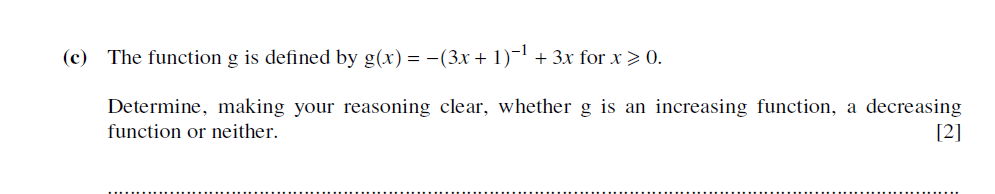

# 03: Q/A Generation using LLaMA

In [13]:
import os
import numpy as np
from groq import Groq
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec, Index
from sklearn.cluster import DBSCAN

# Set the API key for Groq
os.environ["GROQ_API_KEY"] = "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"  # Replace with your actual Groq API key
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

# Initialize Pinecone client
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Replace with your actual Pinecone API key

# List indexes
indexes = pc.list_indexes().names()
if indexes:
    index_name = indexes[0]  # Access the first index in the list and get the 'name'
    index_description = pc.describe_index(index_name)  # Pass the index name as a string
else:
    pc.create_index(
        name='notes',
        dimension=384,  # Update dimension according to your embedding model
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'  # Set your region here
        )
    )

# Access the 'notes' index using the Index class
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Load Sentence-BERT model for generating query embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Function to generate embeddings for user input
def generate_embeddings(texts):
    return model.encode(texts)

# Function to get a response from Groq (LLaMA model)
def get_response_from_lama(prompt: str, model: str = "llama3-8b-8192") -> str:
    try:
        chat_completion = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model=model,
            temperature=0.7,  # Encourage diversity while maintaining reasoning
        )
        return chat_completion.choices[0].message.content
    except Exception as e:
        raise ValueError(f"Groq API call failed: {e}")

# Function to generate a detailed answer for the user query using context from Pinecone
def get_answer_from_query(user_query: str):
    # Step 1: Generate the query embedding
    query_embedding = generate_embeddings([user_query])[0]

    # Step 2: Search Pinecone for the most similar embeddings
    query_result = index.query(vector=query_embedding.tolist(), top_k=3, include_metadata=True)

    # Step 3: Collect relevant context from Pinecone
    context = "\n".join([match['metadata']['content'] for match in query_result['matches']])

    # Step 4: Create the prompt for the LLaMA model, including the context
    llama_prompt = f"""
    Context:
    {context}

    User Query: {user_query}

    You are an AI that reasons step-by-step. For the query above:
    1. Begin by providing a clear definition of the term or concept.
    2. Explain the reasoning behind the definition.
    3. Compare it with similar concepts or provide examples if applicable.
    4. Summarize the key points for the user.

    Answer step-by-step:
    """

    # Step 5: Get the response from LLaMA using Groq
    response = get_response_from_lama(llama_prompt)
    if "Answer step by step:" in response:
        steps, final_answer = response.split("Final Answer:", maxsplit=1)
        print("Reasoning Steps:", steps.strip())
        print("Final Answer:", final_answer.strip())
    else:
        print(response)

    return response

# Function to extract and clean questions
def extract_and_clean_questions(text):
    lines = text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')  # Matches lines containing '© UCLES'
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')  # Matches exam codes like '9709/12/F/M/20'
    turn_over_pattern = re.compile(r'\[Turn over\]')  # Matches '[Turn over]'

    # Add all unwanted patterns to a list
    invalid_patterns = [
        copyright_pattern, exam_code_pattern, turn_over_pattern
    ]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()  # Strip leading and trailing spaces

        # Remove any unwanted patterns from the line (like exam codes and copyright)
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip lines that are too short or contain only unwanted patterns
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Identify and process questions
        if question_pattern.match(line):  # If it's a new question
            if current_question:
                questions.append(current_question.strip())
            current_question = line  # Start a new question
        else:
            current_question += " " + line  # Continue the current question

    if current_question:  # Append the last question
        questions.append(current_question.strip())

    return questions

# Function to perform clustering and generate top questions
def cluster_questions_and_generate_answers(questions):
    # Step 1: Generate embeddings for all questions
    question_embeddings = generate_embeddings(questions)

    # Step 2: Use DBSCAN to cluster questions based on embeddings
    db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
    labels = db.fit_predict(question_embeddings)

    # Step 3: Organize questions by cluster labels
    clustered_questions = {}
    for idx, label in enumerate(labels):
        if label != -1:  # -1 means noise, we skip it
            if label not in clustered_questions:
                clustered_questions[label] = []
            clustered_questions[label].append(questions[idx])

    # Step 4: Sort clusters by size and get the top clusters
    sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)

    # Step 5: For each cluster, generate answers
    top_questions_with_answers = {}
    for i, (cluster_id, questions_in_cluster) in enumerate(sorted_clusters[:5]):  # Top 5 clusters
        cluster_name = f"Cluster {i + 1}"
        top_questions_with_answers[cluster_name] = []

        for question in questions_in_cluster[:3]:  # Get top 3 questions in each cluster
            answer = get_answer_from_query(question)  # Generate answer using LLaMA
            top_questions_with_answers[cluster_name].append({
                "question": question,
                "answer": answer
            })

    return top_questions_with_answers


# Example usage
pdf_path = "/content/ALevels_maths_past_papers.pdf"  # Replace with the actual path to your past paper PDF
raw_text = extract_text_from_pdf(pdf_path)  # Extract raw text from the PDF
questions = extract_and_clean_questions(raw_text)  # Extract and clean questions

# Generate and print QA pairs
top_questions_with_answers = cluster_questions_and_generate_answers(questions)

# Print the results
for cluster_name, questions_answers in top_questions_with_answers.items():
    print(f"\n{cluster_name}:")
    for i, qa in enumerate(questions_answers, 1):
        print(f"Q{i}: {qa['question']}")
        print(f"Answer: {qa['answer']}\n")


I'd be happy to help!

**Step 1: Definition**

The function f is defined as f(x) = x² + x for x < -1.

**Step 2: Reasoning**

To determine whether the function f is increasing, decreasing, or neither, we need to examine the derivative of the function. The derivative of f(x) = x² + x is f'(x) = 2x + 1. Since we're only considering values of x less than -1, we can focus on the behavior of the derivative in that range.

**Step 3: Comparison and Examples**

In general, a function is increasing if its derivative is positive, and decreasing if its derivative is negative. In this case, since the derivative f'(x) = 2x + 1 is always positive for x < -1 (because 2x + 1 is always greater than 0 when x is less than -1), we can conclude that the function f is increasing in this range.

**Step 4: Summary**

To summarize, the function f(x) = x² + x for x < -1 is an increasing function. This is because its derivative f'(x) = 2x + 1 is always positive in this range, indicating that the function is incr

# **Agentic RAG**

In [8]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


**Answer Generation**

In [18]:
import gradio as gr
import os
import pinecone
from sentence_transformers import SentenceTransformer
from groq import Groq


# Initialize API keys
os.environ["GROQ_API_KEY"] = "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"
pinecone_client = pinecone.Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Connect to the Pinecone index
index_name = "notes"
host = 'notes-cl2kd95.svc.aped-4627-b74a.pinecone.io'
index = pinecone_client.Index(index_name, host=host)

# Load Sentence-BERT model for embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Initialize Groq client
groq_client = Groq(api_key=os.environ["GROQ_API_KEY"])


# Define agents as individual functions
def embedding_agent(query):
    """Generates embeddings for the input query."""
    return model.encode(query)


def retrieval_agent(query_embedding, top_k=3):
    """Queries Pinecone for relevant documents."""
    results = index.query(vector=query_embedding.tolist(), top_k=top_k, include_metadata=True)
    if "matches" in results:
        return results["matches"]
    else:
        raise ValueError("No matches found in Pinecone database!")


def answer_generation_agent(context, user_query):
    """Generates answers using Groq's LLaMA model."""
    llama_prompt = f"""
    Context:
    {context}

    User Query: {user_query}

    You are an AI that reasons step-by-step. For the query above:
    1. Begin by providing a clear definition of the term or concept.
    2. Explain the reasoning behind the definition.
    3. Compare it with similar concepts or provide examples if applicable.
    4. Summarize the key points for the user.

    Answer step-by-step:
    """
    try:
        response = groq_client.chat.completions.create(
            messages=[{"role": "user", "content": llama_prompt}],
            model="llama3-8b-8192",
            temperature=0.7,
        )
        return response.choices[0].message.content
    except Exception as e:
        raise RuntimeError(f"Groq API call failed: {e}")


# Chain implementation
class AgentChain:
    def __init__(self):
        self.steps = []

    def add_step(self, agent_function):
        """Add an agent function as a step in the chain."""
        self.steps.append(agent_function)

    def invoke(self, input_data):
        """Invoke the chain step-by-step, passing data between agents."""
        for step in self.steps:
            input_data = step(input_data)
        return input_data


# Define the Agentic RAG Chain
class AgenticRAG:
    def __init__(self, index, model, groq_client):
        self.index = index
        self.model = model
        self.groq_client = groq_client
        self.chain = AgentChain()

        # Define the steps in the chain
        self.chain.add_step(self.run_embedding_agent)
        self.chain.add_step(self.run_retrieval_agent)
        self.chain.add_step(self.run_answer_generation_agent)

    def run_embedding_agent(self, user_query):
        """Run the Embedding Agent."""
        return embedding_agent(user_query)

    def run_retrieval_agent(self, query_embedding):
        """Run the Retrieval Agent."""
        retrieval_results = retrieval_agent(query_embedding)
        return {
            "matches": retrieval_results,
            "user_query": user_query  # Pass user_query along with the results
        }

    def run_answer_generation_agent(self, retrieval_data):
        """Run the Answer Generation Agent."""
        retrieval_results = retrieval_data["matches"]
        user_query = retrieval_data["user_query"]
        context = "\n".join([match["metadata"]["content"] for match in retrieval_results])
        return answer_generation_agent(context, user_query)

    def execute(self, user_query):
        """Execute the full chain."""
        # Pass the user query through all the steps
        retrieval_data = self.chain.invoke(user_query)
        return retrieval_data  # Final answer will come from the last agent


# Define the Gradio interface function
def gradio_interface(user_query):
    # Instantiate the Agentic RAG
    agentic_rag = AgenticRAG(index, model, groq_client)

    try:
        # Get the answer from the Agentic RAG
        answer = agentic_rag.execute(user_query)
        return answer
    except Exception as e:
        return f"Error: {e}"


# Create the Gradio interface
iface = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(label="Enter your query:", placeholder="Ask something..."),
    outputs=gr.Textbox(label="Response"),
    title="Agentic RAG",
    description="Ask a question, and the Agentic RAG system will generate a relevant response based on retrieved context."
)

# Launch the Gradio app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7abd2702f4843576f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Question Generation and grading**

In [32]:
import gradio as gr
import numpy as np
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, Index
from sklearn.metrics.pairwise import cosine_similarity
from transformers import AutoTokenizer, AutoModel
import torch

# Initialize models and Pinecone
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Replace with your actual API key
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Update your index name, host, and API key

# Initialize model and tokenizer for embeddings
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
embedding_model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")

# Function to generate embeddings for a given text
def get_embedding(text: str):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    outputs = embedding_model(**inputs)
    # Mean pooling to get a single vector
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings


# Function to generate question and answer using LLaMA model with improved prompt
def generate_qa(prompt: str) -> tuple:
    # Modify the prompt to instruct LLaMA to clearly separate question and answer
    structured_prompt = f"""
    Based on the topic provided, generate a question and an answer.
    Please follow this format:

    Question: [The question you generate]
    Answer: [The answer]

    Topic: {prompt}
    """

    response = get_response_from_lama(structured_prompt)

    # Try to split the response into a question and an answer
    if "Question:" in response and "Answer:" in response:
        try:
            question = response.split("Question:", 1)[1].split("Answer:", 1)[0].strip()
            answer = response.split("Answer:", 1)[1].strip()
            return question, answer
        except IndexError:
            print("Unexpected response format from LLaMA. Full response:")
            print(response)
            raise ValueError("The response did not properly separate question and answer.")
    elif "Question:" in response:
        # Only question was generated
        question = response.split("Question:", 1)[1].strip()
        print("Only question was generated. Full response:")
        print(response)
        return question, None
    else:
        # Fallback if neither question nor answer was generated
        print("Unexpected response format from LLaMA. Full response:")
        print(response)
        raise ValueError("The response did not contain 'Question:' or 'Answer:' segments.")


# Function to calculate cosine similarity between two texts
def calculate_similarity(user_answer: str, correct_answer: str) -> float:
    # Generate embeddings for both answers
    user_embedding = get_embedding(user_answer)
    correct_embedding = get_embedding(correct_answer)

    # Detach the tensors and convert them to NumPy arrays
    user_embedding_np = user_embedding.detach().numpy()
    correct_embedding_np = correct_embedding.detach().numpy()

    # Calculate cosine similarity
    similarity = cosine_similarity(user_embedding_np, correct_embedding_np)

    return similarity[0][0]  # Extract scalar similarity score


# Grading function with updated flow
def grade_answer(user_answer: str, topic: str):
    # Get the correct answer (this will not be generated until the user submits an answer)
    question, correct_answer = generate_qa(topic)

    # Calculate similarity
    similarity_score = calculate_similarity(user_answer, correct_answer)

    # Provide feedback based on the similarity score
    if similarity_score > 0.9:
        feedback = "Excellent! Your answer is very close to the correct answer."
    elif similarity_score > 0.7:
        feedback = "Good job! Your answer is fairly accurate but could be improved."
    else:
        feedback = "Keep trying! Your answer needs improvement."

    return feedback, correct_answer  # Return feedback and correct answer after grading


# Function to generate question from topic (modified to avoid showing correct answer)
def generate_question_from_topic(topic: str):
    # Use the generate_qa function to create a question from the topic
    question, _ = generate_qa(topic)  # Do not generate or show the correct answer here
    return question


# Gradio Interface (updated to display the correct answer only after the user submits their answer)
with gr.Blocks() as demo:
    with gr.Row():
        topic_input = gr.Textbox(label="Enter Topic", placeholder="Enter the topic you want to be quizzed on:")
        question_output = gr.Textbox(label="Generated Question", interactive=False)
        user_answer_input = gr.Textbox(label="Your Answer", placeholder="Enter your answer here")
        feedback_output = gr.Textbox(label="Your Score", interactive=False)
        correct_answer_output = gr.Textbox(label="Correct Answer", interactive=False)

    # Use queue to handle the process of question generation and grading
    topic_input.submit(generate_question_from_topic, inputs=topic_input, outputs=[question_output]).then(
        user_answer_input.submit(grade_answer, inputs=[user_answer_input, topic_input], outputs=[feedback_output, correct_answer_output])
    )

# Launch Gradio interface
demo.queue().launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ca9a5b15b54ae4b3b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**Relevant Question from past papers**

In [6]:
import re
from pdfminer.high_level import extract_text
from collections import Counter
import numpy as np
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer

# Initialize SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Helper: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        print("Failed to extract text using pdfminer:", e)
        return ""

# Agent 1: Text Extraction Agent
def text_extraction_agent(pdf_path):
    """Extracts raw text from the PDF file."""
    return extract_text_from_pdf(pdf_path)

# Agent 2: Question Extraction Agent
def question_extraction_agent(raw_text):
    """Extracts and cleans questions from raw text."""
    lines = raw_text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')
    turn_over_pattern = re.compile(r'\[Turn over\]')

    invalid_patterns = [copyright_pattern, exam_code_pattern, turn_over_pattern]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()

        # Remove unwanted patterns
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip invalid lines
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Process questions
        if question_pattern.match(line):  # New question
            if current_question:
                questions.append(current_question.strip())
            current_question = line
        else:
            current_question += " " + line

    if current_question:
        questions.append(current_question.strip())

    return questions

# Agent 3: Clustering Agent
def clustering_agent(questions):
    """Clusters questions using DBSCAN."""
    question_embeddings = model.encode(questions)
    db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
    labels = db.fit_predict(question_embeddings)

    clustered_questions = {}
    for idx, label in enumerate(labels):
        if label != -1:  # -1 is noise
            if label not in clustered_questions:
                clustered_questions[label] = []
            clustered_questions[label].append(questions[idx])

    # Sort clusters by size
    sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)
    return sorted_clusters

# Agent 4: Most Frequent Questions Agent
def most_frequent_questions_agent(questions):
    """Identifies the most frequent questions."""
    question_counts = Counter(questions)
    most_common_questions = question_counts.most_common(10)  # Top 10
    return most_common_questions

# Agent Chain
class AgenticRAG:
    def __init__(self):
        self.steps = []

    def add_step(self, agent_function):
        self.steps.append(agent_function)

    def invoke(self, input_data):
        for step in self.steps:
            input_data = step(input_data)
        return input_data

# Define the Agentic RAG Chain
agentic_rag = AgenticRAG()
agentic_rag.add_step(text_extraction_agent)
agentic_rag.add_step(question_extraction_agent)
agentic_rag.add_step(clustering_agent)
agentic_rag.add_step(most_frequent_questions_agent)

# Execute the chain
pdf_path = "/content/ALevels_maths_past_papers.pdf"
raw_text = text_extraction_agent(pdf_path)
questions = question_extraction_agent(raw_text)

# Run clustering and frequency analysis
clusters = clustering_agent(questions)
most_frequent = most_frequent_questions_agent(questions)

# Output Results
print("\n**Top Frequently Asked Questions (Using Clustering):**")
for i, (cluster_id, cluster_questions) in enumerate(clusters[:5]):
    print(f"\nCluster {i+1}:")
    for question in cluster_questions[:3]:
        print(f"- {question}")

print("\n**Top 10 Most Frequent Questions:**")
for i, (question, count) in enumerate(most_frequent):
    print(f"Q{i+1}: {question} (Asked {count} times)")



**Top Frequently Asked Questions (Using Clustering):**

Cluster 1:
- The function f is deﬁned by f + x2 for x < −1. Determine whether f is an increasing function, a decreasing function or neither. 9709/12/F/M/20 The graph of y = f is transformed to the graph of y = 1 + f Describe fully the two single transformations which have been combined to give the resulting transformation. 9709/12/F/M/20 [Turn over y = x2 + 1 The diagram shows part of the curve with equation y = x2 + 1. The shaded region enclosed by the curve, the y-axis and the line y = 5 is rotated through 360Å about the y-axis. Find the volume obtained. 9709/12/F/M/20 A curve has equation y = x2 − 2x − 3. A point is moving along the curve in such a way that at P the y-coordinate is increasing at 4 units per second and the x-coordinate is increasing at 6 units per second. Find the x-coordinate of P. 9709/12/F/M/20 [Turn over Solve the equation for 0Å ≤ 1 ≤ 90Å. tan 1 + 3 sin 1 + 2 tan 1 − 3 sin 1 + 1 9709/12/F/M/20 The coeﬃcien

In [10]:
import re
from pdfminer.high_level import extract_text
from collections import Counter
import numpy as np
from sklearn.cluster import DBSCAN
from sentence_transformers import SentenceTransformer
import gradio as gr

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Helper: Extract text from PDF
def extract_text_from_pdf(pdf_path):
    try:
        text = extract_text(pdf_path)
        return text
    except Exception as e:
        print("Failed to extract text using pdfminer:", e)
        return ""

# Extract and clean questions
def question_extraction_agent(raw_text):
    """Extracts and cleans questions from raw text."""
    lines = raw_text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')
    turn_over_pattern = re.compile(r'\[Turn over\]')

    invalid_patterns = [copyright_pattern, exam_code_pattern, turn_over_pattern]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()

        # Remove unwanted patterns
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip invalid lines
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Process questions
        if question_pattern.match(line):  # New question
            if current_question:
                questions.append(current_question.strip())
            current_question = line
        else:
            current_question += " " + line

    if current_question:
        questions.append(current_question.strip())

    return questions

# Clustering Agent
def clustering_agent(questions):
    """Clusters questions using DBSCAN."""
    question_embeddings = model.encode(questions)
    db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
    labels = db.fit_predict(question_embeddings)

    clustered_questions = {}
    for idx, label in enumerate(labels):
        if label != -1:  # -1 is noise
            if label not in clustered_questions:
                clustered_questions[label] = []
            clustered_questions[label].append(questions[idx])

    # Sort clusters by size
    sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)
    return sorted_clusters

# Most Frequent Questions Agent
def most_frequent_questions_agent(questions):
    """Identifies the most frequent questions."""
    question_counts = Counter(questions)
    most_common_questions = question_counts.most_common(10)  # Top 10
    return most_common_questions

# Processing Function
def process_pdf():
    # Predefined PDF path
    pdf_path = "/content/ALevels_maths_past_papers.pdf"

    # Step 1: Extract text
    raw_text = extract_text_from_pdf(pdf_path)

    # Step 2: Extract and clean questions
    questions = question_extraction_agent(raw_text)

    # Step 3: Generate DBSCAN clusters
    clusters = clustering_agent(questions)

    # Step 4: Find most frequent questions
    most_frequent = most_frequent_questions_agent(questions)

    # Format DBSCAN results
    dbscan_result = ""
    for i, (cluster_id, cluster_questions) in enumerate(clusters[:5]):
        dbscan_result += f"\nCluster {i+1}:\n"
        for question in cluster_questions[:3]:  # Show top 3 questions per cluster
            dbscan_result += f"- {question}\n"

    # Format Most Frequent Questions results
    frequent_result = ""
    for i, (question, count) in enumerate(most_frequent):
        frequent_result += f"Q{i+1}: {question} (Asked {count} times)\n"

    return dbscan_result.strip(), frequent_result.strip()

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("# PDF Question Analysis")
    gr.Markdown("This tool analyzes a predefined PDF for:")
    gr.Markdown("- Top clusters of similar questions (via DBSCAN)")
    gr.Markdown("- Top 10 most frequently asked questions")

    with gr.Row():
        with gr.Column():
            dbscan_output = gr.Textbox(label="Top Clusters (DBSCAN)", lines=20)
        with gr.Column():
            frequent_output = gr.Textbox(label="Top 10 Most Frequent Questions", lines=20)

    analyze_button = gr.Button("generate questions")

    analyze_button.click(process_pdf, inputs=None, outputs=[dbscan_output, frequent_output])

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f4c1fe0b8bf37324b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


**QA From past paper by LLAMa**

In [12]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00


In [13]:
import os
import numpy as np
import re
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType, AgentExecutor
from langchain.llms import OpenAI
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec, Index
from groq import Groq
from sklearn.cluster import DBSCAN
from PyPDF2 import PdfReader  # To extract text from the PDF


# Set the API key for Groq
os.environ["GROQ_API_KEY"] = "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"  # Replace with your actual Groq API key
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

# Initialize Pinecone client
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Replace with your actual Pinecone API key

# List indexes
indexes = pc.list_indexes().names()
if indexes:
    index_name = indexes[0]  # Access the first index in the list and get the 'name'
    index_description = pc.describe_index(index_name)  # Pass the index name as a string
else:
    pc.create_index(
        name='notes',
        dimension=384,  # Update dimension according to your embedding model
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'  # Set your region here
        )
    )

# Access the 'notes' index using the Index class
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Load Sentence-BERT model for generating query embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


# Define the Agent class
class RAGAgent:
    def __init__(self, client, index, model, api_key):
        self.client = client
        self.index = index
        self.model = model
        self.api_key = api_key

    def generate_embeddings(self, texts):
        return self.model.encode(texts)

    def get_response_from_lama(self, prompt: str, model: str = "llama3-8b-8192") -> str:
        try:
            chat_completion = self.client.chat.completions.create(
                messages=[{"role": "user", "content": prompt}],
                model=model,
                temperature=0.7,
            )
            return chat_completion.choices[0].message.content
        except Exception as e:
            raise ValueError(f"Groq API call failed: {e}")

    def get_answer_from_query(self, user_query: str):
        query_embedding = self.generate_embeddings([user_query])[0]
        query_result = self.index.query(vector=query_embedding.tolist(), top_k=3, include_metadata=True)

        context = "\n".join([match['metadata']['content'] for match in query_result['matches']])

        llama_prompt = f"""
        Context:
        {context}

        User Query: {user_query}

        You are an AI that reasons step-by-step. For the query above:
        1. Begin by providing a clear definition of the term or concept.
        2. Explain the reasoning behind the definition.
        3. Compare it with similar concepts or provide examples if applicable.
        4. Summarize the key points for the user.

        Answer step-by-step:
        """

        response = self.get_response_from_lama(llama_prompt)
        if "Answer step by step:" in response:
            steps, final_answer = response.split("Final Answer:", maxsplit=1)
            return final_answer.strip()
        else:
            return response


# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    pdf_reader = PdfReader(pdf_path)
    text = ''
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text


# Function to extract and clean questions
def extract_and_clean_questions(text):
    lines = text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')  # Matches lines containing '© UCLES'
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')  # Matches exam codes like '9709/12/F/M/20'
    turn_over_pattern = re.compile(r'\[Turn over\]')  # Matches '[Turn over]'

    # Add all unwanted patterns to a list
    invalid_patterns = [
        copyright_pattern, exam_code_pattern, turn_over_pattern
    ]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()  # Strip leading and trailing spaces

        # Remove any unwanted patterns from the line (like exam codes and copyright)
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip lines that are too short or contain only unwanted patterns
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Identify and process questions
        if question_pattern.match(line):  # If it's a new question
            if current_question:
                questions.append(current_question.strip())
            current_question = line  # Start a new question
        else:
            current_question += " " + line  # Continue the current question

    if current_question:  # Append the last question
        questions.append(current_question.strip())

    return questions


# Function to perform clustering and generate top questions
def cluster_questions_and_generate_answers(questions):
    # Step 1: Generate embeddings for all questions
    question_embeddings = model.encode(questions)

    # Step 2: Use DBSCAN to cluster questions based on embeddings
    db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
    labels = db.fit_predict(question_embeddings)

    # Step 3: Organize questions by cluster labels
    clustered_questions = {}
    for idx, label in enumerate(labels):
        if label != -1:  # -1 means noise, we skip it
            if label not in clustered_questions:
                clustered_questions[label] = []
            clustered_questions[label].append(questions[idx])

    # Step 4: Sort clusters by size and get the top clusters
    sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)

    # Step 5: For each cluster, generate answers
    top_questions_with_answers = {}
    for i, (cluster_id, questions_in_cluster) in enumerate(sorted_clusters[:5]):  # Top 5 clusters
        cluster_name = f"Cluster {i + 1}"
        top_questions_with_answers[cluster_name] = []

        for question in questions_in_cluster[:3]:  # Get top 3 questions in each cluster
            answer = rag_agent.get_answer_from_query(question)  # Generate answer using LLaMA
            top_questions_with_answers[cluster_name].append({
                "question": question,
                "answer": answer
            })

    return top_questions_with_answers


# Instantiate the agent
rag_agent = RAGAgent(client, index, model, api_key="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")


# Create the chain by calling functions in sequence
def process_pdf_and_generate_answers(pdf_path):
    # Step 1: Extract text from the PDF
    raw_text = extract_text_from_pdf(pdf_path)

    # Step 2: Extract and clean questions
    questions = extract_and_clean_questions(raw_text)

    # Step 3: Cluster the questions and generate answers
    top_questions_with_answers = cluster_questions_and_generate_answers(questions)

    # Step 4: Print results
    for cluster_name, questions_answers in top_questions_with_answers.items():
        print(f"\n{cluster_name}:")
        for i, qa in enumerate(questions_answers, 1):
            print(f"Q{i}: {qa['question']}")
            print(f"Answer: {qa['answer']}\n")


# Example usage
pdf_path = "/content/ALevels_maths_past_papers.pdf"  # Replace with the actual path to your past paper PDF
process_pdf_and_generate_answers(pdf_path)



Cluster 1:
Q1: 1Thefunctionf is deﬁnedby f /lparx/rpar=1 3x+2+x2forx< −1. Determinewhetherfis anincreasing function, adecreasing function orneither. [3] ©UCLES2020 9709/12/F/M/203 2Thegraph of y=f/lparx/rparistransformed to thegraph of y=1+f/lparb1 Describe fully the two single transformations which have be en combined to give the resulting transformation. [4] ©UCLES2020 9709/12/F/M/20 [Turnover4 The diagram shows part of the curve with equation y=x2+1. The shaded region enclosed by the curve, the y-axis and theline y=5is rotated through 360 /degreesabout the y-axis. Findthevolumeobtained. [4] ©UCLES2020 9709/12/F/M/205 4A curve has equation y=x2−2x−3. A point is moving along the curve in such a way that at Pthe y-coordinateisincreasingat4unitspersecondandthe x-coordinateisincreasingat6unitspersecond. Findthex-coordinateof P. [4] ©UCLES2020 9709/12/F/M/20 [Turnover6 5Solvetheequation tan/thetaslant+3sin/thetaslant+2 tan/thetaslant−3sin/thetaslant+1=2 for0/degrees ≤/thetaslant≤90/degre

In [28]:
import os
import numpy as np
import re
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType, AgentExecutor
from langchain.llms import OpenAI
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec, Index
from groq import Groq
from sklearn.cluster import DBSCAN
from PyPDF2 import PdfReader  # To extract text from the PDF
import gradio as gr


# Set the API key for Groq
os.environ["GROQ_API_KEY"] = "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"  # Replace with your actual Groq API key
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

# Initialize Pinecone client
pc = Pinecone(api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")  # Replace with your actual Pinecone API key

# List indexes
indexes = pc.list_indexes().names()
if indexes:
    index_name = indexes[0]  # Access the first index in the list and get the 'name'
    index_description = pc.describe_index(index_name)  # Pass the index name as a string
else:
    pc.create_index(
        name='notes',
        dimension=384,  # Update dimension according to your embedding model
        metric='cosine',
        spec=ServerlessSpec(
            cloud='aws',
            region='us-east-1'  # Set your region here
        )
    )

# Access the 'notes' index using the Index class
index = Index(name='notes', host='notes-cl2kd95.svc.aped-4627-b74a.pinecone.io', api_key="f9e88f78-e0f7-40bd-aff4-6d5bd8c94132")

# Load Sentence-BERT model for generating query embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


# Define the Agent class
class RAGAgent:
    def __init__(self, client, index, model, api_key):
        self.client = client
        self.index = index
        self.model = model
        self.api_key = api_key

    def generate_embeddings(self, texts):
        return self.model.encode(texts)

    def get_response_from_lama(self, prompt: str, model: str = "llama3-8b-8192") -> str:
        try:
            chat_completion = self.client.chat.completions.create(
                messages=[{"role": "user", "content": prompt}],
                model=model,
                temperature=0.7,
            )
            return chat_completion.choices[0].message.content
        except Exception as e:
            raise ValueError(f"Groq API call failed: {e}")

    def get_answer_from_query(self, user_query: str):
        query_embedding = self.generate_embeddings([user_query])[0]
        query_result = self.index.query(vector=query_embedding.tolist(), top_k=3, include_metadata=True)

        context = "\n".join([match['metadata']['content'] for match in query_result['matches']])

        llama_prompt = f"""
        Context:
        {context}

        User Query: {user_query}

        You are an AI that reasons step-by-step. For the query above:
        1. Begin by providing a clear definition of the term or concept.
        2. Explain the reasoning behind the definition.
        3. Compare it with similar concepts or provide examples if applicable.
        4. Summarize the key points for the user.

        Answer step-by-step:
        """

        response = self.get_response_from_lama(llama_prompt)
        if "Answer step by step:" in response:
            steps, final_answer = response.split("Final Answer:", maxsplit=1)
            return final_answer.strip()
        else:
            return response


# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    pdf_reader = PdfReader(pdf_path)
    text = ''
    for page in pdf_reader.pages:
        text += page.extract_text()
    return text


# Function to extract and clean questions
def extract_and_clean_questions(text):
    lines = text.splitlines()
    question_pattern = re.compile(r'^\d+[\.\)]?\s')  # Matches numbered questions like '1 ', '2.', '3)'

    # Patterns to filter out
    copyright_pattern = re.compile(r'© UCLES')  # Matches lines containing '© UCLES'
    exam_code_pattern = re.compile(r'\d{4}/\d{2}/\w{2}/\w{2}')  # Matches exam codes like '9709/12/F/M/20'
    turn_over_pattern = re.compile(r'\[Turn over\]')  # Matches '[Turn over]'

    # Add all unwanted patterns to a list
    invalid_patterns = [
        copyright_pattern, exam_code_pattern, turn_over_pattern
    ]

    questions = []
    current_question = ""

    for line in lines:
        line = line.strip()  # Strip leading and trailing spaces

        # Remove any unwanted patterns from the line (like exam codes and copyright)
        line = re.sub(exam_code_pattern, '', line)
        line = re.sub(copyright_pattern, '', line)
        line = re.sub(turn_over_pattern, '', line)

        # Skip lines that are too short or contain only unwanted patterns
        if len(line) < 10 or line.count('.') > 5 or any(pattern.search(line) for pattern in invalid_patterns):
            continue

        # Identify and process questions
        if question_pattern.match(line):  # If it's a new question
            if current_question:
                questions.append(current_question.strip())
            current_question = line  # Start a new question
        else:
            current_question += " " + line  # Continue the current question

    if current_question:  # Append the last question
        questions.append(current_question.strip())

    return questions


# Function to perform clustering and generate top questions
def cluster_questions_and_generate_answers(questions):
    # Step 1: Generate embeddings for all questions
    question_embeddings = model.encode(questions)

    # Step 2: Use DBSCAN to cluster questions based on embeddings
    db = DBSCAN(eps=0.5, min_samples=2, metric='cosine')
    labels = db.fit_predict(question_embeddings)

    # Step 3: Organize questions by cluster labels
    clustered_questions = {}
    for idx, label in enumerate(labels):
        if label != -1:  # -1 means noise, we skip it
            if label not in clustered_questions:
                clustered_questions[label] = []
            clustered_questions[label].append(questions[idx])

    # Step 4: Sort clusters by size and get the top clusters
    sorted_clusters = sorted(clustered_questions.items(), key=lambda x: len(x[1]), reverse=True)

    # Step 5: For each cluster, generate answers
    top_questions_with_answers = {}
    for i, (cluster_id, questions_in_cluster) in enumerate(sorted_clusters[:5]):  # Top 5 clusters
        cluster_name = f"Cluster {i + 1}"
        top_questions_with_answers[cluster_name] = []

        for question in questions_in_cluster[:3]:  # Get top 3 questions in each cluster
            answer = rag_agent.get_answer_from_query(question)  # Generate answer using LLaMA
            top_questions_with_answers[cluster_name].append({
                "question": question,
                "answer": answer
            })

    return top_questions_with_answers


# Instantiate the agent
rag_agent = RAGAgent(client, index, model, api_key="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")


# Define a function for Gradio interface
def gradio_process_pdf_and_generate_answers():
    try:
        # Define the pre-existing PDF path
        pdf_path = "/content/ALevels_maths_past_papers.pdf"

        # Process the PDF and generate answers
        raw_text = extract_text_from_pdf(pdf_path)
        questions = extract_and_clean_questions(raw_text)
        top_questions_with_answers = cluster_questions_and_generate_answers(questions)

        # Prepare results for display
        result = ""
        for cluster_name, questions_answers in top_questions_with_answers.items():
            result += f"\n{cluster_name}:\n"
            for i, qa in enumerate(questions_answers, 1):
                result += f"Q{i}: {qa['question']}\n"
                result += f"Answer: {qa['answer']}\n\n"
        return result

    except Exception as e:
        return f"An error occurred: {str(e)}"


# Gradio interface setup
demo = gr.Interface(
    fn=gradio_process_pdf_and_generate_answers,
    inputs=None,
    outputs=gr.Textbox(label="Generated Questions and Answers"),
    title="Question Generation and Answering System",
    description="This system processes a predefined PDF of past papers or documents to generate questions and provide answers.",
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d2f3d614debf7256f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
